In [35]:
import mne 
import numpy as np
import os
import matplotlib.pyplot as plt
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler

In [3]:
def arrayFiles(path):
    folderContent = os.listdir(path)
    fifFiles = []
    for i in folderContent :
        fifFiles.append(path + "/" + i)
    
    return fifFiles

In [4]:
#concatenate path to name of each file and store in array for reading in data
path = '/Volumes/flash64/EpochedEEG'
allFifFiles = arrayFiles(path)


In [5]:
epoch = mne.read_epochs(allFifFiles[0],preload=True)

Reading /Volumes/flash64/EpochedEEG/20131216_1441_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5424 matching events found
Applying baseline correction (mode: mean)
5424 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [241]:
#see all event ids
epoch.event_id

{'congruent': 133,
 'correct': 129,
 'f_baby': 155,
 'f_bell': 156,
 'f_bird': 157,
 'f_burp': 158,
 'f_dog': 159,
 'f_drum': 160,
 'f_knock': 161,
 'f_laugh': 162,
 'f_phone': 163,
 'f_train': 164,
 'f_water': 165,
 'flanker_stim_1': 1,
 'flanker_stim_10': 10,
 'flanker_stim_11': 11,
 'flanker_stim_12': 12,
 'flanker_stim_2': 2,
 'flanker_stim_3': 3,
 'flanker_stim_4': 4,
 'flanker_stim_5': 5,
 'flanker_stim_6': 6,
 'flanker_stim_7': 7,
 'flanker_stim_8': 8,
 'flanker_stim_9': 9,
 'incongruent': 134,
 'incorrect': 130,
 'left_button': 131,
 'right_button': 132,
 't_baby': 135,
 't_bell': 136,
 't_bird': 137,
 't_burp': 138,
 't_dog': 139,
 't_drum': 140,
 't_knock': 141,
 't_laugh': 142,
 't_phone': 143,
 't_train': 144,
 't_water': 145,
 'target_stim_13': 13,
 'target_stim_14': 14,
 'target_stim_15': 15,
 'target_stim_16': 16,
 'target_stim_17': 17,
 'target_stim_18': 18,
 'target_stim_19': 19,
 'target_stim_20': 20,
 'target_stim_21': 21,
 'target_stim_22': 22,
 'target_stim_23': 23

In [9]:
#first just classify a flanker and a target of same.
singleTargetFlanker = epoch['f_baby','t_baby']
singleTargetFlanker.event_id

{'f_baby': 155, 't_baby': 135}

In [12]:
dataX = singleTargetFlanker.get_data()
eventsY = singleTargetFlanker.events[:,-1]

clf = make_pipeline(Vectorizer(),
                    MinMaxScaler(),
                    LogisticRegression())

#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)

scoress = []
for train,test in cv.split(dataX,eventsY):
    clf.fit(dataX[train],eventsY[train])
    scoress.append(clf.score(dataX[test],eventsY[test]))

In [13]:
print("mean classification score", np.mean(scoress))

mean classification score 0.6262820512820514


In [38]:
''''f_baby': 155,
 'f_bell': 156,
 'f_bird': 157,
 'f_burp': 158,
 'f_dog': 159,
 'f_drum': 160,
 'f_knock': 161,
 'f_laugh': 162,
 'f_phone': 163,
 'f_train': 164,
 'f_water': 165,'''

flankerEpochs = epoch['f_baby','f_bell','f_bird','f_burp','f_dog','f_drum','f_knock',
             'f_laugh','f_phone','f_train','f_water']

targetEpochs = epoch['t_baby','t_bell','t_bird','t_burp','t_dog','t_drum','t_knock',
             't_laugh','t_phone','t_train','t_water']

#targetEpochs.plot(n_channels=20)

flankerTargetEpoch = epoch['f_baby','f_bell','f_bird','f_burp','f_dog','f_drum','f_knock',
             'f_laugh','f_phone','f_train','f_water','t_baby','t_bell','t_bird','t_burp','t_dog','t_drum','t_knock',
             't_laugh','t_phone','t_train','t_water']

test = flankerTargetEpoch

for i in range(0,1280):
    if test.events[i][-1] in (155, 156, 157,158,159,160,161,162,163,164,165):
        test.events[i][-1] = 0
    elif test.events[i][-1] in (135, 136, 137,138,139,140,141,142,143,144,145):
        test.events[i][-1] = 1

#test.events


In [39]:
dataXX = test.get_data()
eventsYY = test.events[:,-1]

clf = make_pipeline(Vectorizer(),
                    MinMaxScaler(),
                    LDA())

#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)

scoresss = []
for train,test in cv.split(dataXX,eventsYY):
    clf.fit(dataXX[train],eventsYY[train])
    scoresss.append(clf.score(dataXX[test],eventsYY[test]))

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn

In [42]:
print("mean classification score", np.mean(scoresss))

mean classification score 0.75390625


In [442]:
#print(flankerTargetEpoch.events)
data = test.get_data()
print(data.shape)

events = flankerTargetEpoch.events[:,-1]
#events = events.reshape(events.shape[0],1)
print(events)
print(events.shape)

XX = data[:,-1] 
print(XX.shape)

#init pca and fit to data
pca = UnsupervisedSpatialFilter(PCA(), average=False)
pca_data = pca.fit_transform(data)

(1280, 129, 180)
[144 162 142 ... 161 142 161]
(1280,)
(1280, 180)


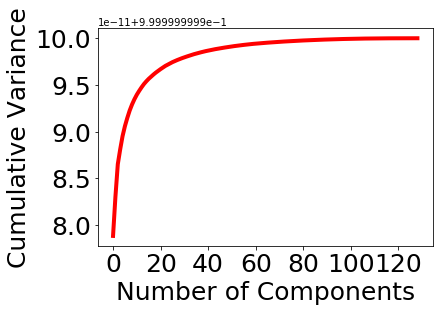

In [399]:
comp_variance = np.cumsum(pca.estimator.explained_variance_ratio_)
plt.plot(comp_variance, linewidth = 4.0, color = 'R')
plt.xlabel('Number of Components', fontsize = 25)
plt.ylabel('Cumulative Variance', fontsize = 25);
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);

In [ ]:
clf = make_pipeline(Vectorizer(),
                    MinMaxScaler(),
                    LogisticRegression())

#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)

scores = []
for train,test in cv.split(data,events):
    clf.fit(data[train],events[train])
    scores.append(clf.score(data[test],events[test]))

In [ ]:
print("mean classification score", np.mean(scores))

In [ ]:
#seperate all flanker events
"""
f_baby_events = epoch.events[epoch.events[:,-1] == 155]
f_bell_events = epoch.events[epoch.events[:,-1] == 156]
f_bird_events = epoch.events[epoch.events[:,-1] == 157] 
f_burp_events = epoch.events[epoch.events[:,-1] == 158]
f_dog_events = epoch.events[epoch.events[:,-1] == 159] 
f_drum_events = epoch.events[epoch.events[:,-1] == 160]
f_knock_events = epoch.events[epoch.events[:,-1] == 161]
f_laugh_events = epoch.events[epoch.events[:,-1] == 162]
f_phone_events = epoch.events[epoch.events[:,-1] == 163]
f_train_events = epoch.events[epoch.events[:,-1] == 164]
f_water_events = epoch.events[epoch.events[:,-1] == 165]
"""


In [291]:
"""
flankerEpochs = np.concatenate((f_baby_events,f_bell_events,f_bird_events,f_burp_events,
                               f_dog_events,f_drum_events,f_knock_events,f_laugh_events,
                               f_phone_events,f_train_events,f_water_events),axis=0)
                               """

In [293]:
#this only saves event info in arrays NOT the data!
"""
t_baby_events = epoch.events[epoch.events[:,-1] == 135]
t_bell_events = epoch.events[epoch.events[:,-1] == 136]
t_bird_events = epoch.events[epoch.events[:,-1] == 13] 
t_burp_events = epoch.events[epoch.events[:,-1] == 138]
t_dog_events = epoch.events[epoch.events[:,-1] == 139] 
t_drum_events = epoch.events[epoch.events[:,-1] == 140]
t_knock_events = epoch.events[epoch.events[:,-1] == 141]
t_laugh_events = epoch.events[epoch.events[:,-1] == 142]
t_phone_events = epoch.events[epoch.events[:,-1] == 143]
t_train_events = epoch.events[epoch.events[:,-1] == 144]
t_water_events = epoch.events[epoch.events[:,-1] == 145]
"""

In [294]:
#cocatenate the events
"""
targetEpochs = np.concatenate((t_baby_events,t_bell_events,t_bird_events,t_burp_events,
                               t_dog_events,t_drum_events,t_knock_events,t_laugh_events,
                               t_phone_events,t_train_events,t_water_events),axis=0)
"""

In [303]:
#now i have two arrays flanker/target events.
#I want only one array with both flanker and target
"""
flankers_targets = np.concatenate((f_baby_events,f_bell_events,f_bird_events,f_burp_events,
                               f_dog_events,f_drum_events,f_knock_events,f_laugh_events,
                               f_phone_events,f_train_events,f_water_events,t_baby_events,t_bell_events,t_bird_events,t_burp_events,
                               t_dog_events,t_drum_events,t_knock_events,t_laugh_events,
                               t_phone_events,t_train_events,t_water_events),axis=0) """